# **CHEKPOINT 2**

In [11]:
import pandas as pd

file_path="/content/Economic Indicators And Inflation.csv"
df=pd.read_csv(file_path)
df.head()


,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53


In [12]:
import pandas as pd

# DATA UNDERSTANDING

dataset ini diperoleh dari kaggle dengan klasifikasi Economic Indicators & Inflation Dataset (Worldwide)

In [14]:
df = pd.read_csv('/content/Economic Indicators And Inflation.csv')
df.head()

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53


1.cek jumlah baris dan kolom dataset memiliki 514 dan 7 kolom

In [15]:
print("jumlah baris dan kolom dataset")
df.shape

jumlah baris dan kolom dataset


(304, 6)

2.cek tipe data setiap kolom

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 304 non-null    object 
 1    Year                   304 non-null    int64  
 2    GDP (in billion USD)   304 non-null    float64
 3    Inflation Rate (%)     304 non-null    float64
 4    Unemployment Rate (%)  304 non-null    float64
 5    Economic Growth (%)    304 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 14.4+ KB


3.Tampilkan 5 data pertama untuk melihat isi dataset jika baris banyak

In [17]:
df

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53
...,...,...,...,...,...,...
299,Pakistan,2021,296.0,8.90,5.00,5.70
300,Pakistan,2022,350.0,12.30,5.00,6.00
301,Pakistan,2023,400.0,20.00,5.00,4.00
302,Pakistan,2024,450.0,25.00,5.00,3.00


4.Statistik deskriptif

In [18]:
df.describe()

,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
count,304.000000,304.000000,304.000000,304.000000,304.000000
mean,2017.500000,3173.934211,35.531776,6.805493,3.391349
std,4.617373,4365.913537,131.757515,6.687968,3.626414
min,2010.000000,1.000000,-1.200000,1.600000,-14.000000
25%,2013.750000,475.000000,1.635000,4.275000,1.700000
50%,2017.500000,1900.000000,3.300000,5.400000,2.900000
75%,2021.250000,3425.000000,5.857500,7.800000,5.905000
max,2025.000000,22500.000000,857.000000,85.500000,13.700000


# **DATA PREPARATION**

1.Nilai Yang Hilang

In [19]:
print((df.isna().sum() / len(df)) * 100)

Country                   0.0
 Year                     0.0
 GDP (in billion USD)     0.0
 Inflation Rate (%)       0.0
 Unemployment Rate (%)    0.0
 Economic Growth (%)      0.0
dtype: float64


2.Duplicated Value

In [20]:
print((df.isna().sum() / len(df)) * 100)

Country                   0.0
 Year                     0.0
 GDP (in billion USD)     0.0
 Inflation Rate (%)       0.0
 Unemployment Rate (%)    0.0
 Economic Growth (%)      0.0
dtype: float64


3.Outliers

In [21]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Year,0.000000
GDP (in billion USD),9.210526
Inflation Rate (%),10.855263
Unemployment Rate (%),2.631579
Economic Growth (%),3.618421


In [22]:
df

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53
...,...,...,...,...,...,...
299,Pakistan,2021,296.0,8.90,5.00,5.70
300,Pakistan,2022,350.0,12.30,5.00,6.00
301,Pakistan,2023,400.0,20.00,5.00,4.00
302,Pakistan,2024,450.0,25.00,5.00,3.00


4.Inconsisten Value

Menurut Saya, dataset yang saya teliti tidak ada nilai yang tidak konsisten



# **PENANGANAN TERHADAP DATA**

Nilai Yang Hilang (Missing Value)

In [23]:
missing_values = df.isnull().sum()

Tidak ada nilai yang hilang

2.Duplicated Values(Dihapus semua duplikasi)

In [24]:
df = df.drop_duplicates()

In [25]:
df

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53
...,...,...,...,...,...,...
299,Pakistan,2021,296.0,8.90,5.00,5.70
300,Pakistan,2022,350.0,12.30,5.00,6.00
301,Pakistan,2023,400.0,20.00,5.00,4.00
302,Pakistan,2024,450.0,25.00,5.00,3.00



3.Outliers(Melakukan Imputasi)

In [26]:
def impute_outliers(col):
    median = col.median()
    return col.apply(lambda x: median if x < lower_bound[col.name] or x > upper_bound[col.name] else x)

Cek Ulang

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Year,0.000000
GDP (in billion USD),9.210526
Inflation Rate (%),10.855263
Unemployment Rate (%),2.631579
Economic Growth (%),3.618421


In [27]:
df

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53
...,...,...,...,...,...,...
299,Pakistan,2021,296.0,8.90,5.00,5.70
300,Pakistan,2022,350.0,12.30,5.00,6.00
301,Pakistan,2023,400.0,20.00,5.00,4.00
302,Pakistan,2024,450.0,25.00,5.00,3.00


Incosistent Value
Menurut Saya, dataset yang saya teliti tidak ada nilai yang tidak konsisten



#**konstruksi data (Construct Data) (penambahan kolom)**

Menambahkan Kolom GDP Growth

In [28]:
df.columns = df.columns.str.strip()

In [29]:
df["Real GDP Growth (%)"] = df["Economic Growth (%)"] - df["Inflation Rate (%)"]

In [30]:
df

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%),Real GDP Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55,0.91
1,USA,2011,15500.0,3.16,8.94,1.53,-1.63
2,USA,2012,16000.0,2.07,8.10,2.28,0.21
3,USA,2013,16500.0,1.50,7.70,1.84,0.34
4,USA,2014,17000.0,1.62,7.25,2.53,0.91
...,...,...,...,...,...,...,...
299,Pakistan,2021,296.0,8.90,5.00,5.70,-3.20
300,Pakistan,2022,350.0,12.30,5.00,6.00,-6.30
301,Pakistan,2023,400.0,20.00,5.00,4.00,-16.00
302,Pakistan,2024,450.0,25.00,5.00,3.00,-22.00


# **REDUKSI DATA**


Menurut saya untuk melakukan reduksi data di dataset saya tidak diperlukan karena menurut saya isi dataset saya sudah relevan

# **CHEKPOINT 3**

# Dataset ini diperoleh dari kaggle Economic Indicators & Inflation Dataset

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('/content/Economic Indicators And Inflation.csv')

df

,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53
...,...,...,...,...,...,...
299,Pakistan,2021,296.0,8.90,5.00,5.70
300,Pakistan,2022,350.0,12.30,5.00,6.00
301,Pakistan,2023,400.0,20.00,5.00,4.00
302,Pakistan,2024,450.0,25.00,5.00,3.00


# **1. Visualisasi Data yang Relevan dengan Business Understanding**

1.Negara yang memiliki ratio inflasi terbanyak

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
print(df.columns)

Index(['Country', ' Year', ' GDP (in billion USD)', ' Inflation Rate (%)',
       ' Unemployment Rate (%)', ' Economic Growth (%)'],
      dtype='object')


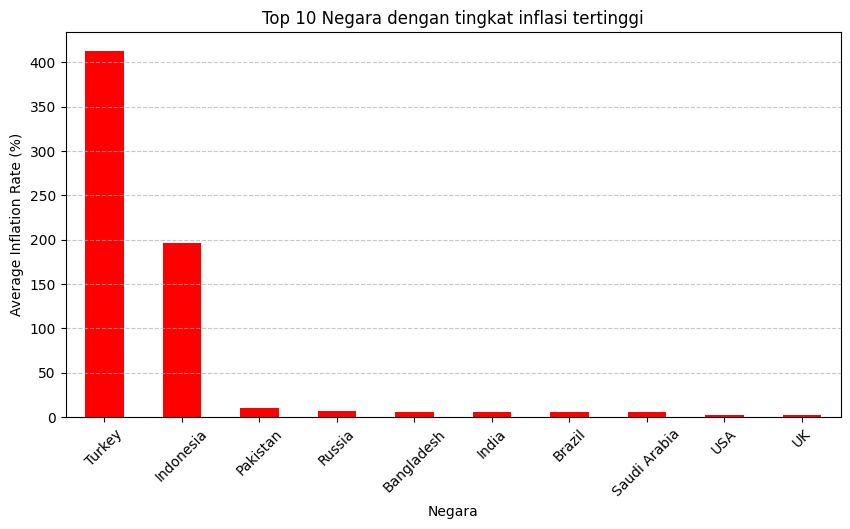

In [66]:
inflation_by_country = df.groupby("Country")[" Inflation Rate (%)"].mean()
top_inflation_countries = inflation_by_country.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_inflation_countries.plot(kind='bar', color='red')
plt.xlabel("Negara")
plt.ylabel("Average Inflation Rate (%)")
plt.title("Top 10 Negara dengan tingkat inflasi tertinggi")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


2.Negara yang memiliki rasio pengangguran terbanyak

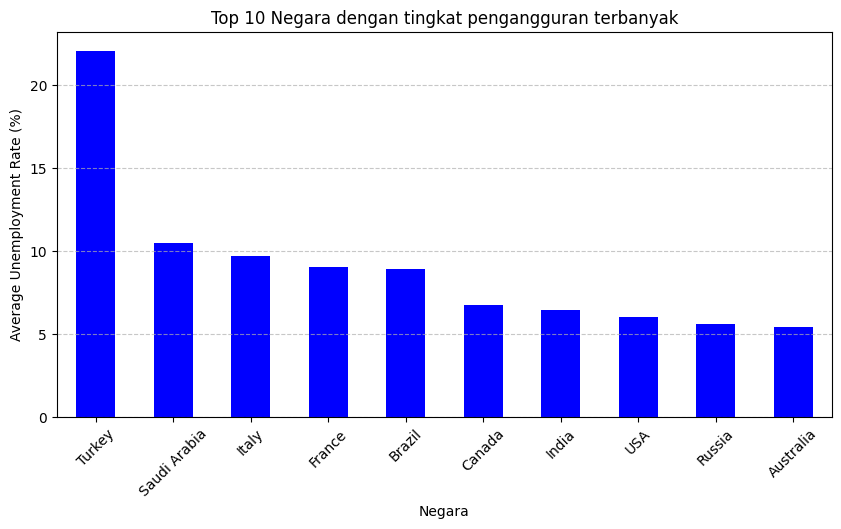

In [67]:
unemployment_by_country = df.groupby("Country")[" Unemployment Rate (%)"].mean()
top_unemployment_countries = unemployment_by_country.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_unemployment_countries.plot(kind='bar', color='blue')
plt.xlabel("Negara")
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Top 10 Negara dengan tingkat pengangguran terbanyak")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3.Negara Yang memiliki pertumbuhan ekonomi tertinggi

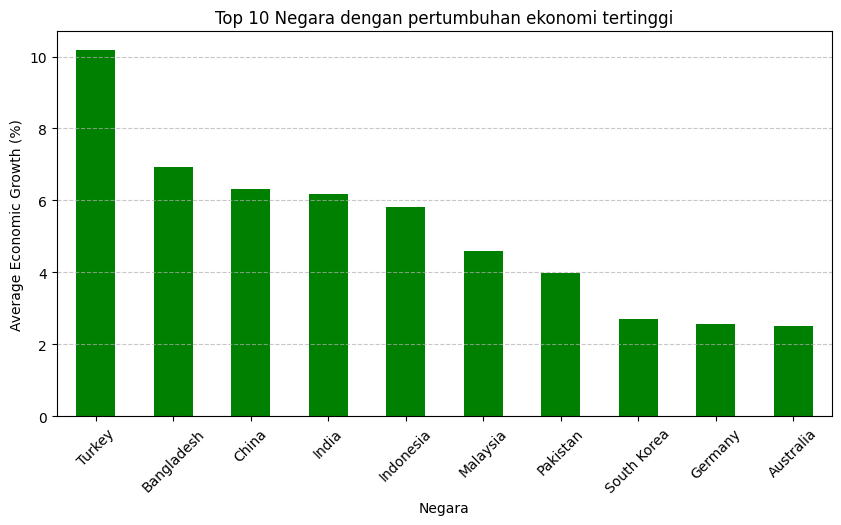

In [65]:
growth_by_country = df.groupby("Country")[" Economic Growth (%)"].mean()
top_growth_countries = growth_by_country.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_growth_countries.plot(kind='bar', color='green')
plt.xlabel("Negara")
plt.ylabel("Average Economic Growth (%)")
plt.title("Top 10 Negara dengan pertumbuhan ekonomi tertinggi")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Insight Dan Tindakan yang dapat diambil berdasarkan hasil visualisasi yang dibuat**

1. Inflasi Tinggi di Beberapa Negara
Insight: Negara seperti Turkey dan Indonesia mengalami inflasi yang sangat tinggi dibandingkan negara lain.
Tindakan:
Pemerintah dapat menerapkan kebijakan moneter ketat seperti menaikkan suku bunga untuk menekan laju inflasi.
Mendorong investasi di sektor produksi untuk meningkatkan pasokan barang dan mengurangi tekanan harga.
Subsidi bahan pokok dapat diberikan kepada masyarakat berpenghasilan rendah untuk menjaga daya beli.
2. Tingkat Pengangguran yang Tinggi
Insight: Turkey, Saudi Arabia, dan Italia memiliki tingkat pengangguran yang cukup tinggi.
Tindakan:
Program pelatihan keterampilan dan pendidikan vokasi dapat diperkuat untuk meningkatkan daya saing tenaga kerja.
Insentif pajak bagi perusahaan yang menciptakan lapangan kerja baru.
Mendorong investasi di sektor industri dan startup untuk menyerap lebih banyak tenaga kerja.
3. Negara dengan Pertumbuhan Ekonomi Tinggi
Insight: Turkey, Bangladesh, dan China memiliki pertumbuhan ekonomi tertinggi.
Tindakan:
Negara-negara dengan pertumbuhan tinggi dapat memperkuat keberlanjutan ekonomi dengan diversifikasi sektor industri.
Investasi dalam infrastruktur dan teknologi dapat memastikan pertumbuhan ekonomi tetap stabil.
Menjaga stabilitas politik dan kebijakan ekonomi untuk terus menarik investor asing